<a href="https://colab.research.google.com/github/Pradeep24032004/data_science/blob/main/ProductSalesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_columns=50 #limiting data frame to display max of 50 columns
sns.set(style="darkgrid")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/My Drive/datascience
%pwd
%ls

/content/drive/My Drive/datascience
'car data.csv'   mail_data.csv              sonar.csv              USA_cars_datasets.csv
 data.csv        Mall_Customers.csv         spam_ham_dataset.csv   winequality-red.csv
 income.csv      nba.csv                    statsfinal.csv
 insurance.csv  'Sample - Superstore.xls'   titanic.csv


In [4]:
df = pd.read_csv('statsfinal.csv')
df.head(5)

,Unnamed: 0,Date,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4
0,0,13-06-2010,5422,3725,576,907,17187.74,23616.50,3121.92,6466.91
1,1,14-06-2010,7047,779,3578,1574,22338.99,4938.86,19392.76,11222.62
2,2,15-06-2010,1572,2082,595,1145,4983.24,13199.88,3224.90,8163.85
3,3,16-06-2010,5657,2399,3140,1672,17932.69,15209.66,17018.80,11921.36
4,4,17-06-2010,3668,3207,2184,708,11627.56,20332.38,11837.28,5048.04


**Understanding the data**

In [5]:
df.shape

(4600, 10)

In [6]:
#fetching the column names
df.columns

Index(['Unnamed: 0', 'Date', 'Q-P1', 'Q-P2', 'Q-P3', 'Q-P4', 'S-P1', 'S-P2',
       'S-P3', 'S-P4'],
      dtype='object')

In [7]:
#basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  4600 non-null   int64  
 1   Date        4600 non-null   object 
 2   Q-P1        4600 non-null   int64  
 3   Q-P2        4600 non-null   int64  
 4   Q-P3        4600 non-null   int64  
 5   Q-P4        4600 non-null   int64  
 6   S-P1        4600 non-null   float64
 7   S-P2        4600 non-null   float64
 8   S-P3        4600 non-null   float64
 9   S-P4        4600 non-null   float64
dtypes: float64(4), int64(5), object(1)
memory usage: 359.5+ KB


In [8]:
#checking whether dataset have null values or not
df.isnull().sum()

Unnamed: 0    0
Date          0
Q-P1          0
Q-P2          0
Q-P3          0
Q-P4          0
S-P1          0
S-P2          0
S-P3          0
S-P4          0
dtype: int64

In [9]:
#checking data types of columns
df.dtypes

Unnamed: 0      int64
Date           object
Q-P1            int64
Q-P2            int64
Q-P3            int64
Q-P4            int64
S-P1          float64
S-P2          float64
S-P3          float64
S-P4          float64
dtype: object

In [10]:
#checking whether dataset have duplicate values or not
df.duplicated().sum()

0

In [11]:
#Basic statistical information
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,4600.0,2299.500000,1328.049949,0.00,1149.750,2299.500,3449.250,4599.00
Q-P1,4600.0,4121.849130,2244.271323,254.00,2150.500,4137.000,6072.000,7998.00
Q-P2,4600.0,2130.281522,1089.783705,251.00,1167.750,2134.000,3070.250,3998.00
Q-P3,4600.0,3145.740000,1671.832231,250.00,1695.750,3202.500,4569.000,6000.00
Q-P4,4600.0,1123.500000,497.385676,250.00,696.000,1136.500,1544.000,2000.00
S-P1,4600.0,13066.261743,7114.340094,805.18,6817.085,13114.290,19248.240,25353.66
S-P2,4600.0,13505.984848,6909.228687,1591.34,7403.535,13529.560,19465.385,25347.32
S-P3,4600.0,17049.910800,9061.330694,1355.00,9190.965,17357.550,24763.980,32520.00
S-P4,4600.0,8010.555000,3546.359869,1782.50,4962.480,8103.245,11008.720,14260.00


**Data** **Cleaning**

In [12]:
#randomly selects two rows from the data frame
df.sample(2)

,Unnamed: 0,Date,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4
196,196,26-12-2010,3398,1524,5864,725,10771.66,9662.16,31782.88,5169.25
1449,1449,07-06-2014,7449,1443,1061,270,23613.33,9148.62,5750.62,1925.10


In [13]:
df[df['Date']=="31-9-2010"]

,Unnamed: 0,Date,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4
109,109,31-9-2010,4986,342,4978,558,15805.62,2168.28,26980.76,3978.54


In [15]:
#changing the dtype
from datetime import datetime as dt
#converts date column into datetime object if the date is not valid then it returns NaT
#converting into date time objects helps to perform operations and calculations
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [16]:
#checking whether date column have null values and returning them
df[df['Date'].isnull()]

,Unnamed: 0,Date,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4
109,109,NaT,4986,342,4978,558,15805.62,2168.28,26980.76,3978.54
170,170,NaT,4632,3930,523,1581,14683.44,24916.20,2834.66,11272.53
473,473,NaT,2242,401,5926,789,7107.14,2542.34,32118.92,5625.57
534,534,NaT,325,3476,4588,1771,1030.25,22037.84,24866.96,12627.23
836,836,NaT,1003,256,1346,1449,3179.51,1623.04,7295.32,10331.37
897,897,NaT,2509,2666,4146,593,7953.53,16902.44,22471.32,4228.09
1200,1200,NaT,597,709,5470,1994,1892.49,4495.06,29647.40,14217.22
1261,1261,NaT,7681,1235,347,1087,24348.77,7829.90,1880.74,7750.31
1564,1564,NaT,5333,833,3494,618,16905.61,5281.22,18937.48,4406.34
1625,1625,NaT,3870,2779,3246,1290,12267.90,17618.86,17593.32,9197.70


In [17]:
#filling the NaT values with average of time
df['Date'].fillna(df['Date'].mean(), inplace=True)

In [18]:
df['Date'].isnull().sum()

0

In [19]:
#checking the datatypes of each column
df.dtypes

Unnamed: 0             int64
Date          datetime64[ns]
Q-P1                   int64
Q-P2                   int64
Q-P3                   int64
Q-P4                   int64
S-P1                 float64
S-P2                 float64
S-P3                 float64
S-P4                 float64
dtype: object

In [20]:
#fetching month, day of week, weekday
df['month'] = df['Date'].dt.month_name()
df['day'] = df['Date'].dt.day_name()
df['dayoftheweek'] = df['Date'].dt.weekday
df['year'] = df['Date'].dt.year
df.sample() #sampling a data row

,Unnamed: 0,Date,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4,month,day,dayoftheweek,year
2121,2121,2016-04-13,4516,3927,3259,513,14315.72,24897.18,17663.78,3657.69,April,Wednesday,2,2016


In [21]:
#Dropping column unnamed as it is not usefull for us
df.drop(columns=['Unnamed: 0'], inplace=True)
df.sample()

,Date,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4,month,day,dayoftheweek,year
1547,2014-09-14,2968,3648,5243,1120,9408.56,23128.32,28417.06,7985.6,September,Sunday,6,2014


In [25]:
# Assuming 'Date' is a non-numeric column causing issues
# You can adjust this based on your actual DataFrame structure
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Compute correlation matrix for numeric columns only
corr_matrix = df[numeric_columns].corr()

# Transpose the correlation matrix
transposed_corr_matrix = corr_matrix.T

In [26]:
print(transposed_corr_matrix)

                  Q-P1      Q-P2      Q-P3      Q-P4      S-P1      S-P2  \
Q-P1          1.000000  0.002422 -0.005650 -0.059365  1.000000  0.002422   
Q-P2          0.002422  1.000000  0.003729  0.013082  0.002422  1.000000   
Q-P3         -0.005650  0.003729  1.000000 -0.006693 -0.005650  0.003729   
Q-P4         -0.059365  0.013082 -0.006693  1.000000 -0.059365  0.013082   
S-P1          1.000000  0.002422 -0.005650 -0.059365  1.000000  0.002422   
S-P2          0.002422  1.000000  0.003729  0.013082  0.002422  1.000000   
S-P3         -0.005650  0.003729  1.000000 -0.006693 -0.005650  0.003729   
S-P4         -0.059365  0.013082 -0.006693  1.000000 -0.059365  0.013082   
dayoftheweek -0.002597  0.009255  0.007870  0.006432 -0.002597  0.009255   
year         -0.000866  0.008556  0.005632 -0.009436 -0.000866  0.008556   

                  S-P3      S-P4  dayoftheweek      year  
Q-P1         -0.005650 -0.059365     -0.002597 -0.000866  
Q-P2          0.003729  0.013082      0.00925

<Axes: >

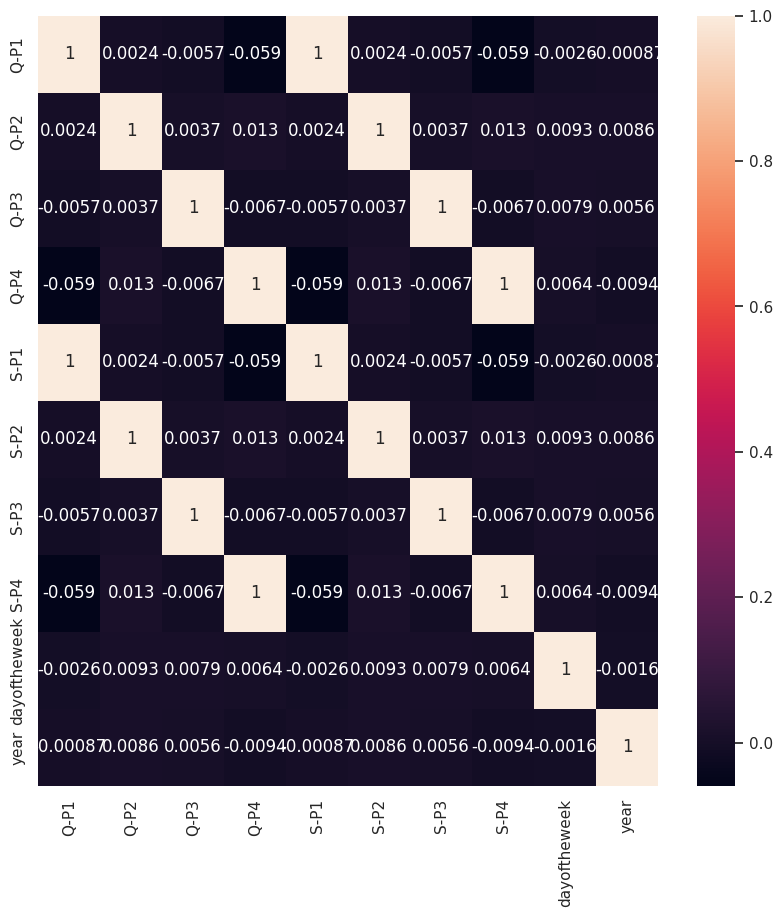

In [27]:
#Analysing the correlation matrix using graph based approach
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True)

In [28]:
#There is no strong correlation between the columns
#unique values in column
for i in df.columns:
  print(i, "------------", df[i].unique())

Date ------------ <DatetimeArray>
['2010-06-13 00:00:00', '2010-06-14 00:00:00', '2010-06-15 00:00:00',
 '2010-06-16 00:00:00', '2010-06-17 00:00:00', '2010-06-18 00:00:00',
 '2010-06-19 00:00:00', '2010-06-20 00:00:00', '2010-06-21 00:00:00',
 '2010-06-22 00:00:00',
 ...
 '2023-01-25 00:00:00', '2023-01-26 00:00:00', '2023-01-27 00:00:00',
 '2023-01-28 00:00:00', '2023-01-29 00:00:00', '2023-01-30 00:00:00',
 '2023-01-31 00:00:00', '2023-02-01 00:00:00', '2023-02-02 00:00:00',
 '2023-02-03 00:00:00']
Length: 4575, dtype: datetime64[ns]
Q-P1 ------------ [5422 7047 1572 ... 1227 3122 1234]
Q-P2 ------------ [3725  779 2082 ... 3404  841 3143]
Q-P3 ------------ [ 576 3578  595 ... 4825 3588 5899]
Q-P4 ------------ [ 907 1574 1145 ... 1161 1151 1112]
S-P1 ------------ [17187.74 22338.99  4983.24 ...  3889.59  9896.74  3911.78]
S-P2 ------------ [23616.5   4938.86 13199.88 ... 21581.36  5331.94 19926.62]
S-P3 ------------ [ 3121.92 19392.76  3224.9  ... 26151.5  19446.96 31972.58]
S-P4 --

**Exploratory Data Analysis**

In [29]:
df.sample()

,Date,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4,month,day,dayoftheweek,year
4585,2023-01-20,4987,1177,3145,1112,15808.79,7462.18,17045.9,7928.56,January,Friday,4,2023


Q-P1    18960506
Q-P2     9799295
Q-P3    14470404
Q-P4     5168100
dtype: int64


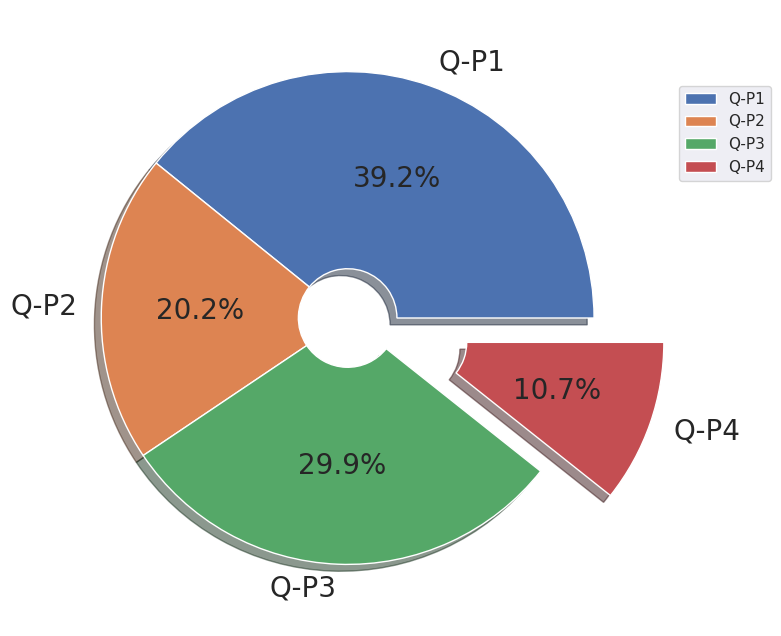

In [32]:
# Total units sales Product 1, Product 2, Product 3, Product 4
q = df[["Q-P1","Q-P2","Q-P3","Q-P4"]].sum()
print(q)
plt.figure(figsize=(8,8))
plt.pie(q,
        labels=df[["Q-P1","Q-P2","Q-P3","Q-P4"]].sum().index,
        shadow=True,autopct="%0.01f%%",textprops={"fontsize":20},
        wedgeprops={'width':0.8},explode=[0,0,0,0.3])
plt.legend(loc='center right', bbox_to_anchor=(1.2, 0.8))

S-P1    60104804.02
S-P2    62127530.30
S-P3    78429589.68
S-P4    36848553.00
dtype: float64


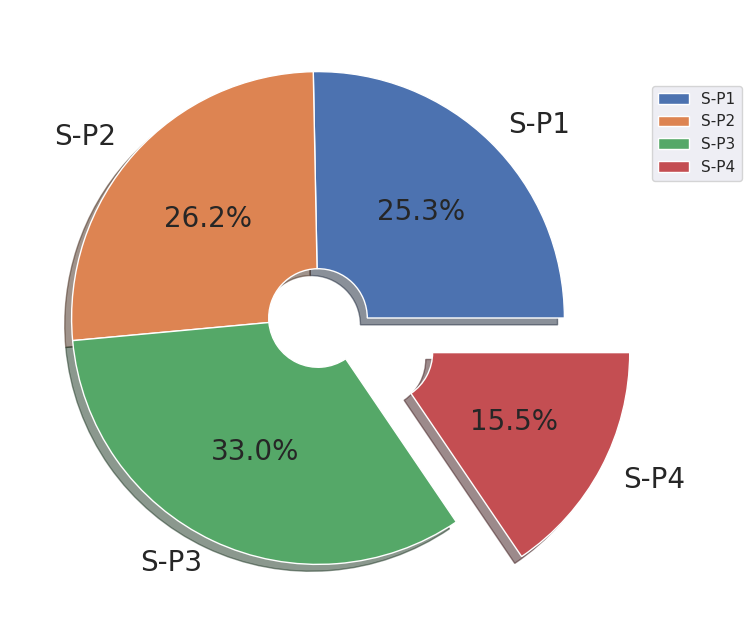

In [33]:
#Total Revenue percent from sales from Product 1, Product 2, pRoduct 3, Product 4
s = df[["S-P1","S-P2","S-P3","S-P4"]].sum()
print(s)
plt.figure(figsize=(8,8))
plt.pie(s, labels=df[["S-P1","S-P2","S-P3","S-P4"]].sum().index, shadow=True, autopct="%0.01f%%", textprops={"fontsize":20}, wedgeprops={'width':0.8}, explode=[0,0,0,0.3])
plt.legend(loc='center right', bbox_to_anchor=(1.2, 0.8))

month
October      416
July         403
January      403
August       390
September    390
November     390
December     390
June         378
March        372
May          372
April        360
February     336
Name: count, dtype: int64


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'June'),
  Text(1, 0, 'July'),
  Text(2, 0, 'August'),
  Text(3, 0, 'September'),
  Text(4, 0, 'October'),
  Text(5, 0, 'November'),
  Text(6, 0, 'December'),
  Text(7, 0, 'January'),
  Text(8, 0, 'February'),
  Text(9, 0, 'March'),
  Text(10, 0, 'April'),
  Text(11, 0, 'May')])

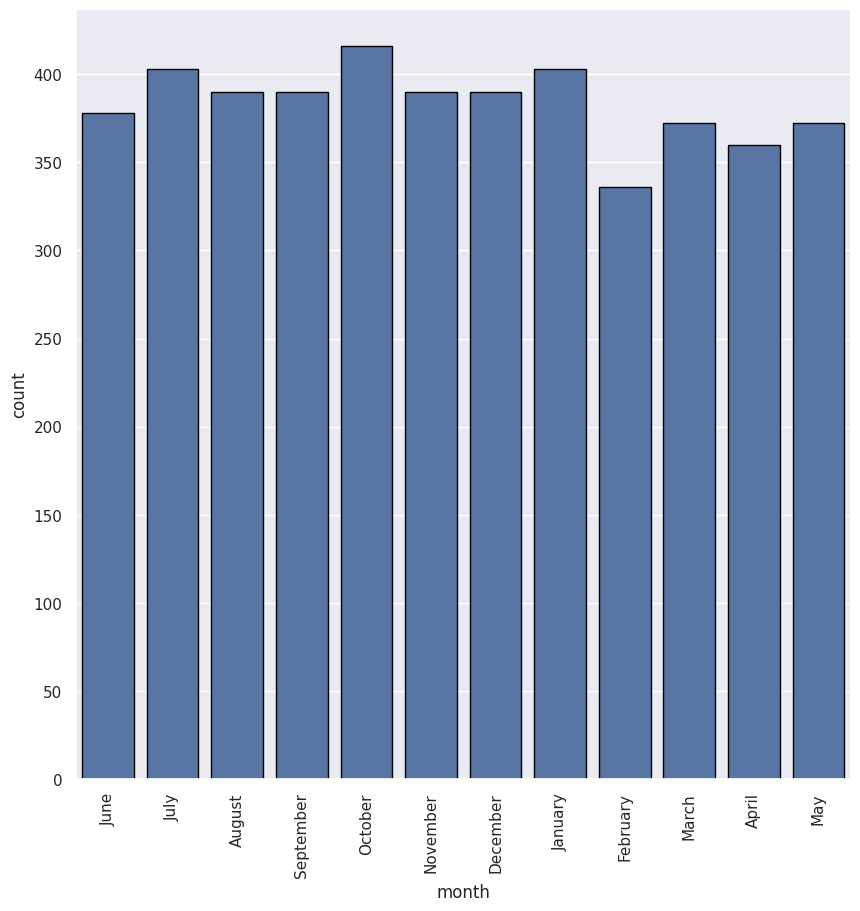

In [34]:
#which is the most occuring month
print(df['month'].value_counts())
plt.figure(figsize=(10,10))
sns.countplot(x='month',data=df,edgecolor='black')
plt.xticks(rotation=90)

day
Saturday     678
Wednesday    655
Sunday       654
Thursday     654
Friday       654
Tuesday      653
Monday       652
Name: count, dtype: int64


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Sunday'),
  Text(1, 0, 'Monday'),
  Text(2, 0, 'Tuesday'),
  Text(3, 0, 'Wednesday'),
  Text(4, 0, 'Thursday'),
  Text(5, 0, 'Friday'),
  Text(6, 0, 'Saturday')])

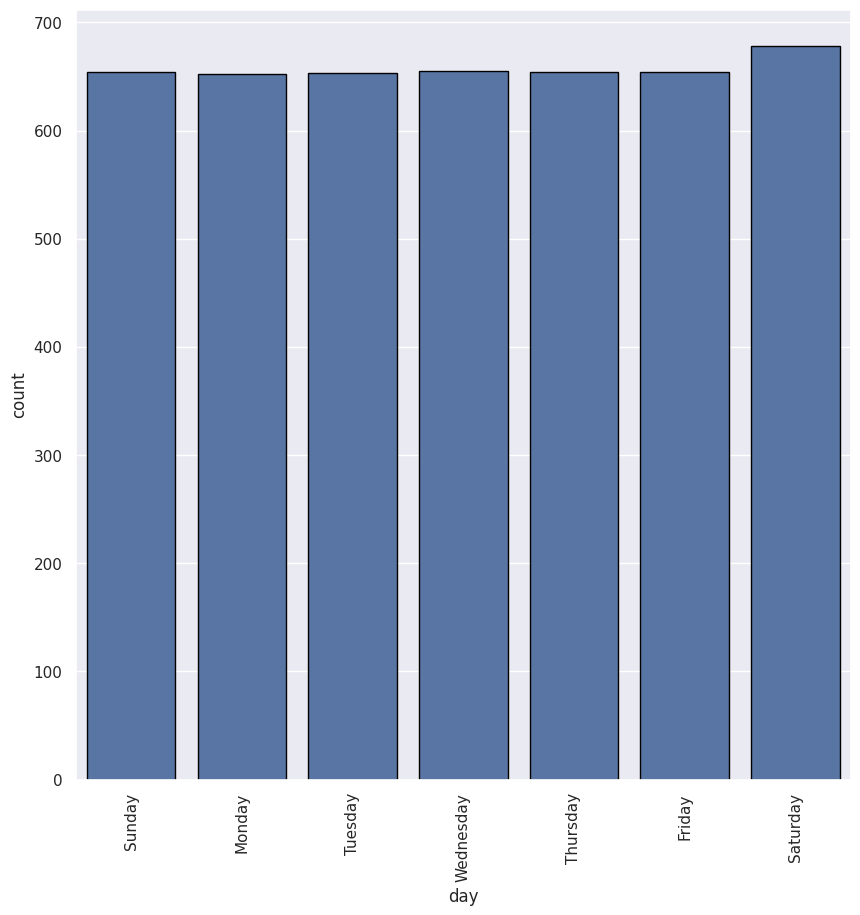

In [35]:
#which is the most occuring day
print(df['day'].value_counts())
plt.figure(figsize=(10,10))
sns.countplot(x='day',data=df,edgecolor='black')
plt.xticks(rotation=90)

year
2016    387
2011    362
2013    362
2014    362
2015    362
2017    362
2018    362
2019    362
2021    362
2022    362
2012    361
2020    361
2010    199
2023     34
Name: count, dtype: int64


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, '2010'),
  Text(1, 0, '2011'),
  Text(2, 0, '2012'),
  Text(3, 0, '2013'),
  Text(4, 0, '2014'),
  Text(5, 0, '2015'),
  Text(6, 0, '2016'),
  Text(7, 0, '2017'),
  Text(8, 0, '2018'),
  Text(9, 0, '2019'),
  Text(10, 0, '2020'),
  Text(11, 0, '2021'),
  Text(12, 0, '2022'),
  Text(13, 0, '2023')])

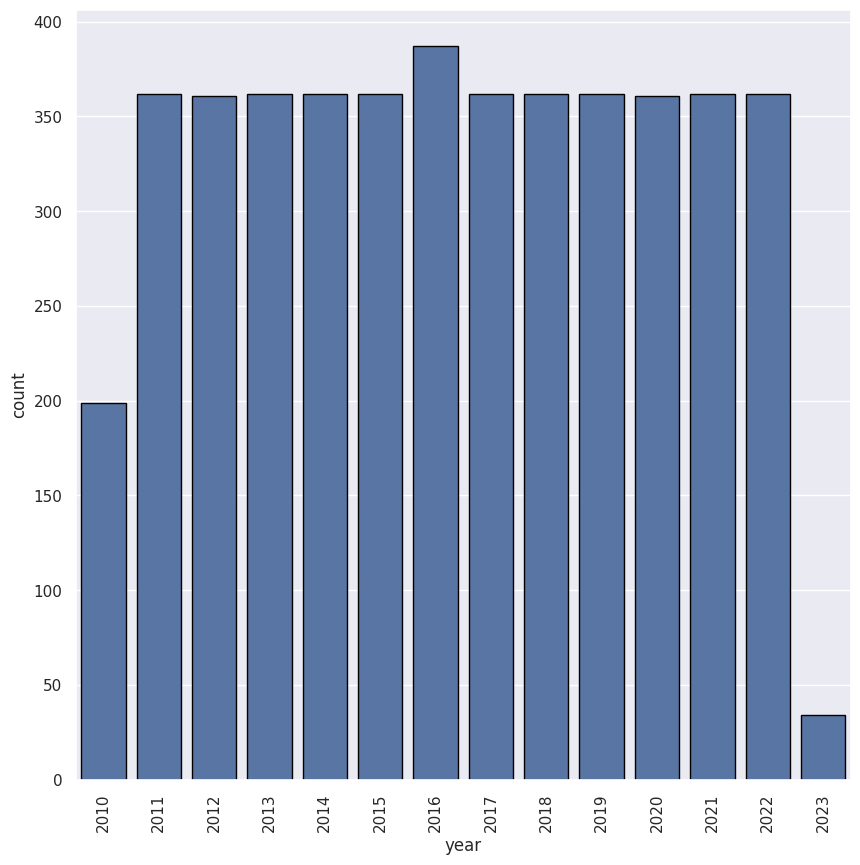

In [36]:
#which is the most occuring year
print(df['year'].value_counts())
plt.figure(figsize=(10,10))
sns.countplot(x='year',data=df,edgecolor='black')
plt.xticks(rotation=90)

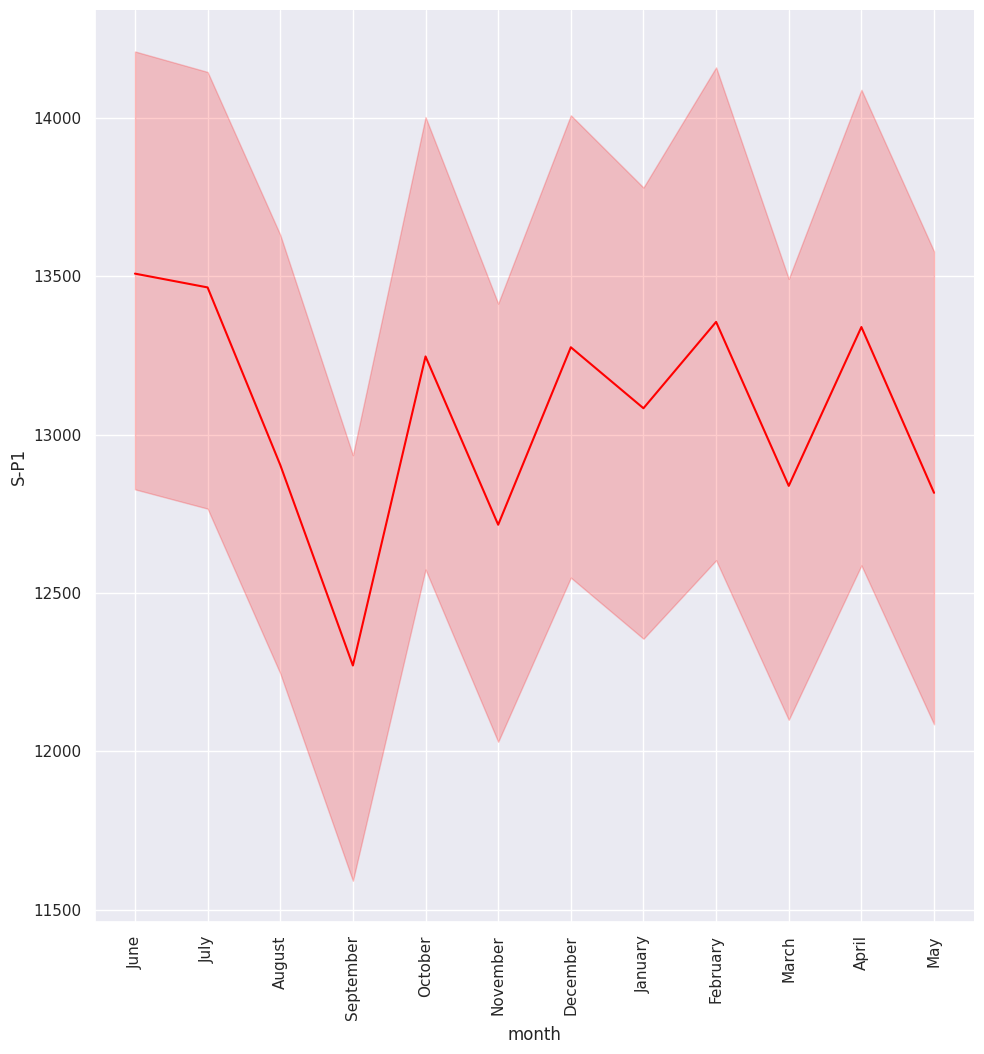

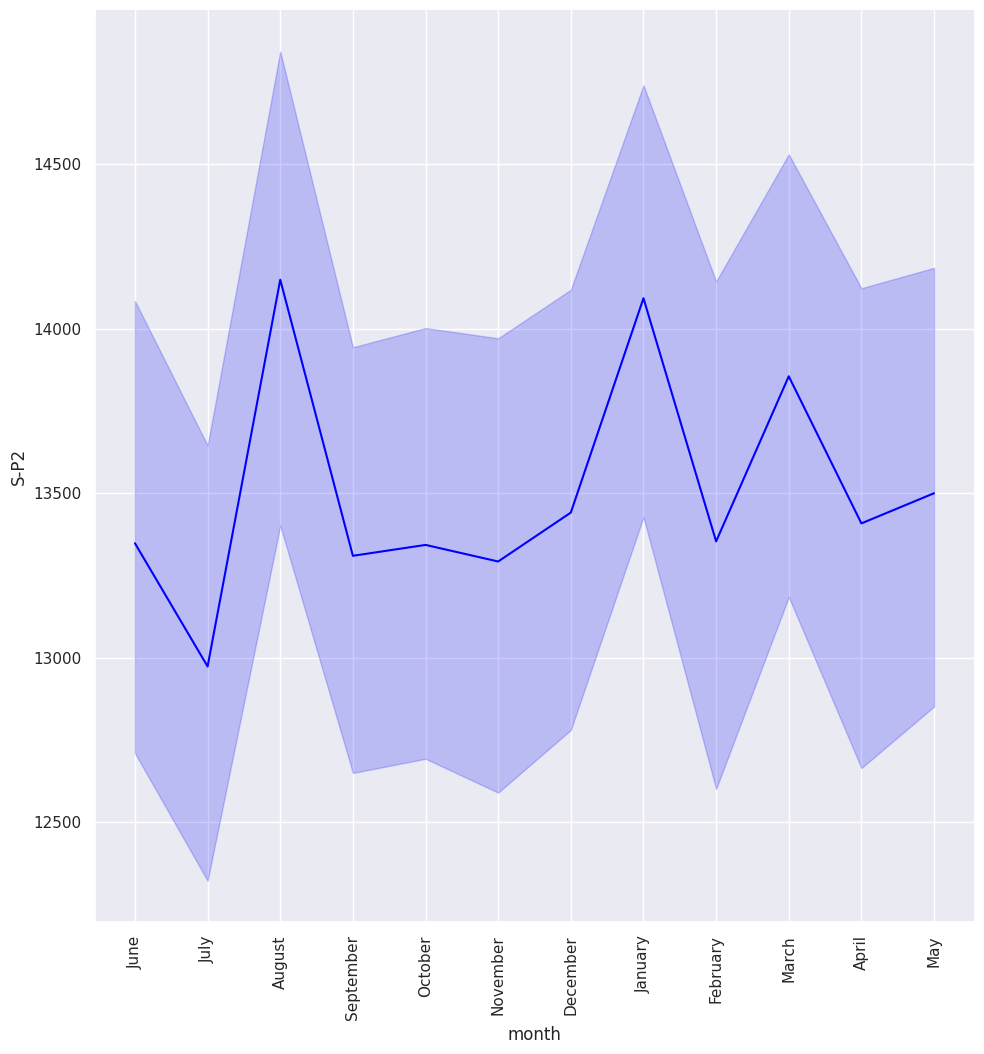

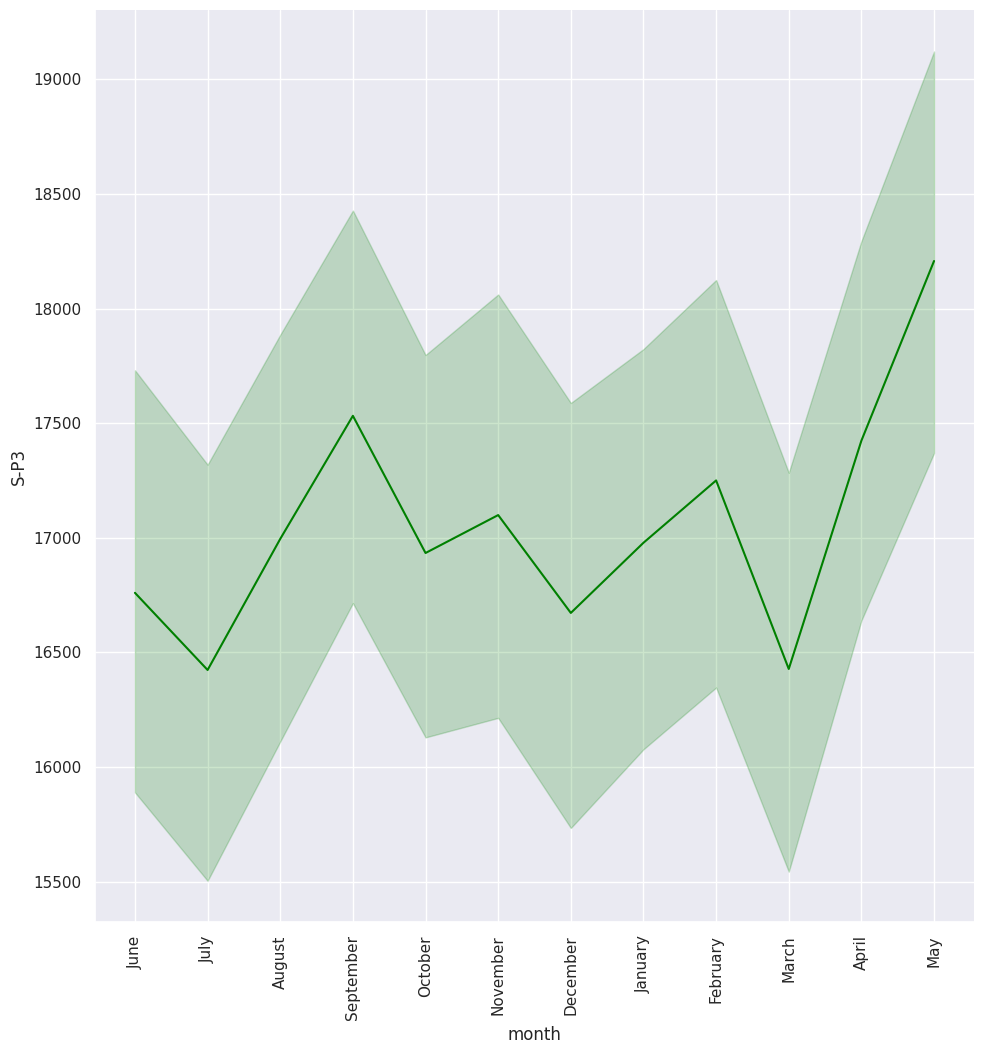

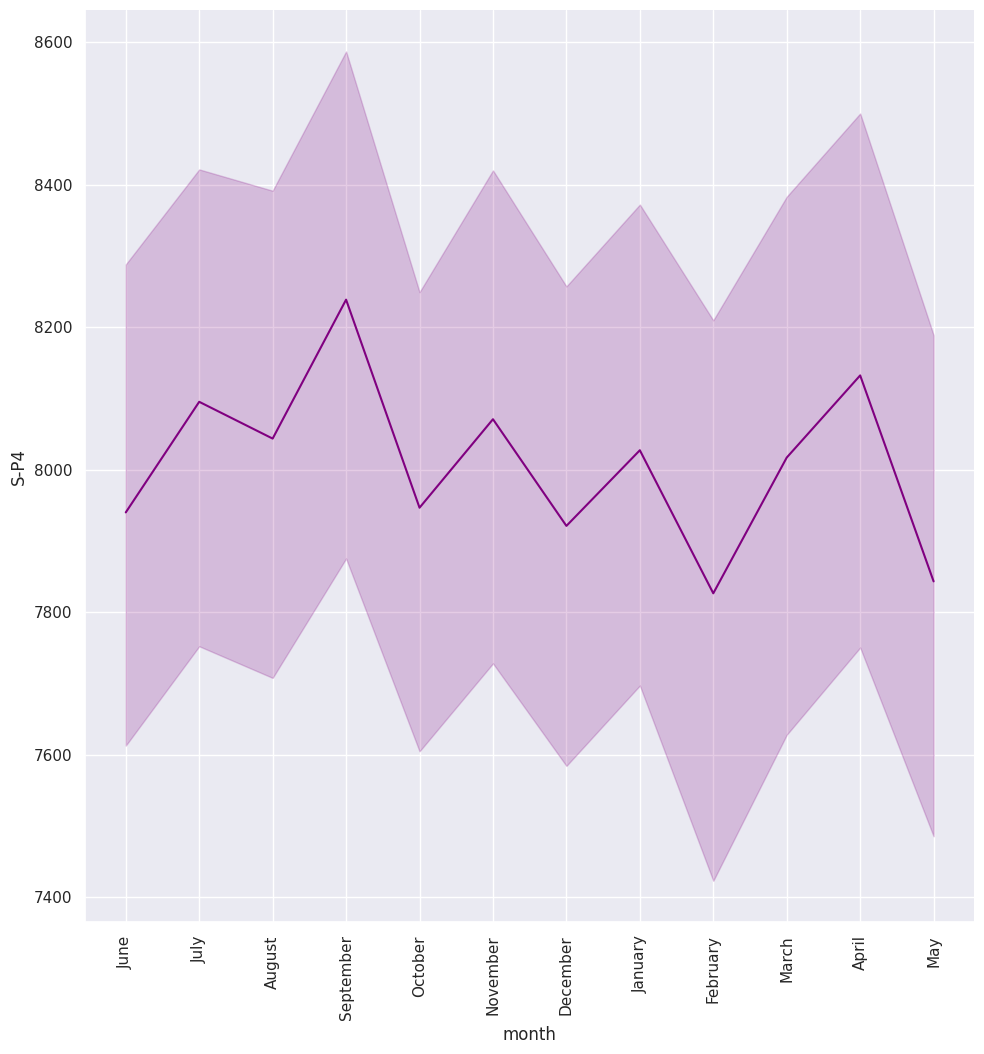

In [40]:
#Monthly distribution of the revenue
sns.relplot(x='month',y='S-P1',data=df,kind='line',height=10,color='red')
plt.xticks(rotation=90);
sns.relplot(x='month',y='S-P2',data=df,kind='line',height=10,color='blue')
plt.xticks(rotation=90);
sns.relplot(x='month',y='S-P3',data=df,kind='line',height=10,color='green')
plt.xticks(rotation=90);
sns.relplot(x='month',y='S-P4',data=df,kind='line',height=10,color='purple')
plt.xticks(rotation=90);

In [41]:
#In which month revenue was it peak
df.groupby('month')[['S-P1','S-P2','S-P3','S-P4']].sum()

,S-P1,S-P2,S-P3,S-P4
month,,,,
April,4802375.65,4826870.24,6272544.32,2927620.78
August,5032774.42,5518177.50,6628101.74,3137000.36
December,5177646.59,5241931.02,6502103.00,3089200.84
February,4487670.73,4486678.52,5796061.28,2629665.21
January,5272626.13,5679403.70,6842229.68,3234973.69
July,5426396.49,5228021.06,6618524.60,3262381.41
June,5106248.68,5045340.30,6335204.94,3001309.33
March,4775839.58,5154185.42,6111066.26,2982307.88
May,4767692.68,5021875.96,6773238.50,2917653.04


from matplotlib import pyplot as plt
_df_0['S-P1'].plot(kind='hist', bins=20, title='S-P1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['S-P2'].plot(kind='hist', bins=20, title='S-P2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['S-P3'].plot(kind='hist', bins=20, title='S-P3')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['S-P4'].plot(kind='hist', bins=20, title='S-P4')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='S-P1', y='S-P2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='S-P2', y='S-P3', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='S-P3', y='S-P4', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['S-P1'].plot(kind='line', figsize=(8, 4), title='S-P1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['S-P2'].plot(kind='line', figsize=(8, 4), title='S-P2')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['S-P3'].plot(kind='line', figsize=(8, 4), title='S-P3')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['S-P4'].plot(kind='line', figsize=(8, 4), title='S-P4')
plt.gca().spines[['top', 'right']].set_visible(False)

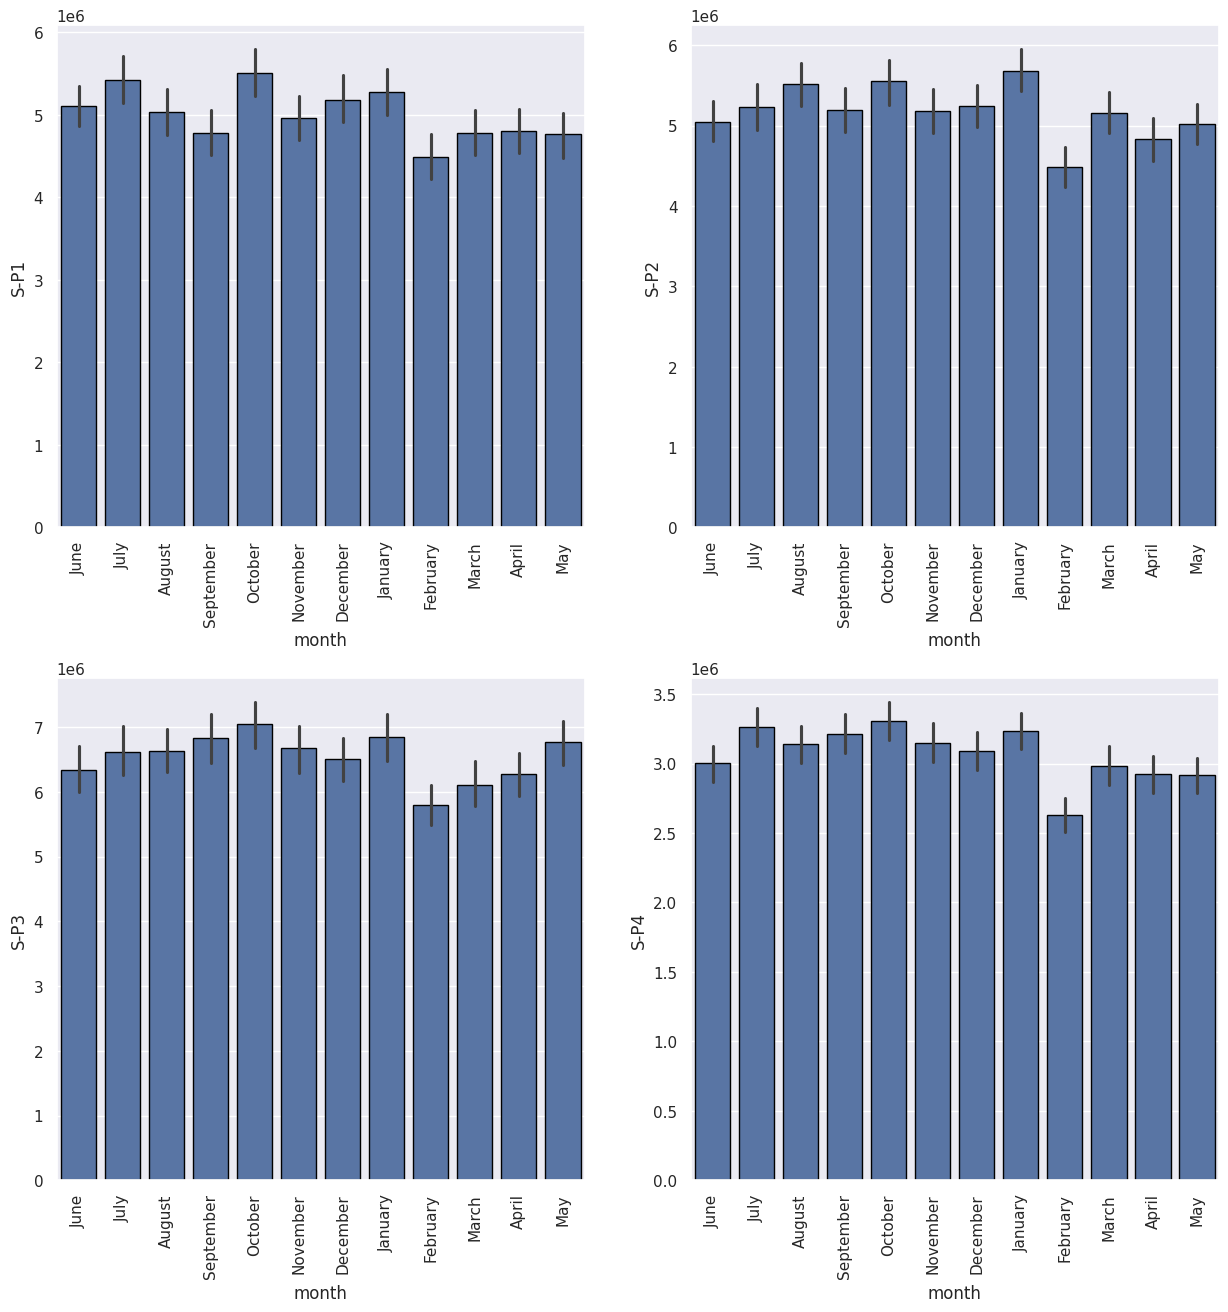

In [42]:
plt.figure(figsize=(15,15),dpi=100)
plt.subplot(2,2,1)
sns.barplot(x="month",y="S-P1",data=df,edgecolor="black",estimator=sum)
plt.xticks(rotation=90);
plt.subplot(2,2,2)
sns.barplot(x="month",y="S-P2",data=df,edgecolor="black",estimator=sum)
plt.xticks(rotation=90);
plt.subplot(2,2,3)
sns.barplot(x="month",y="S-P3",data=df,edgecolor="black",estimator=sum)
plt.xticks(rotation=90);
plt.subplot(2,2,4)
sns.barplot(x="month",y="S-P4",data=df,edgecolor="black",estimator=sum)
plt.xticks(rotation=90)
plt.subplots_adjust(hspace=0.3);

In [43]:
df.sample()

,Date,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4,month,day,dayoftheweek,year
183,2010-12-13,5843,2283,4160,1239,18522.31,14474.22,22547.2,8834.07,December,Monday,0,2010


In [44]:
#In which month unit sales were more in Product 1, Product 2, Product 3,Product 4
df.groupby('month')[['Q-P1','Q-P2','Q-P3','Q-P4']].sum()

,Q-P1,Q-P2,Q-P3,Q-P4
month,,,,
April,1514945,761336,1157296,410606
August,1587626,870375,1222897,439972
December,1633327,826803,1199650,433268
February,1415669,707678,1069384,368817
January,1663289,895805,1262404,453713
July,1711797,824609,1221130,457557
June,1610804,795795,1168857,420941
March,1506574,812963,1127503,418276
May,1504004,792094,1249675,409208


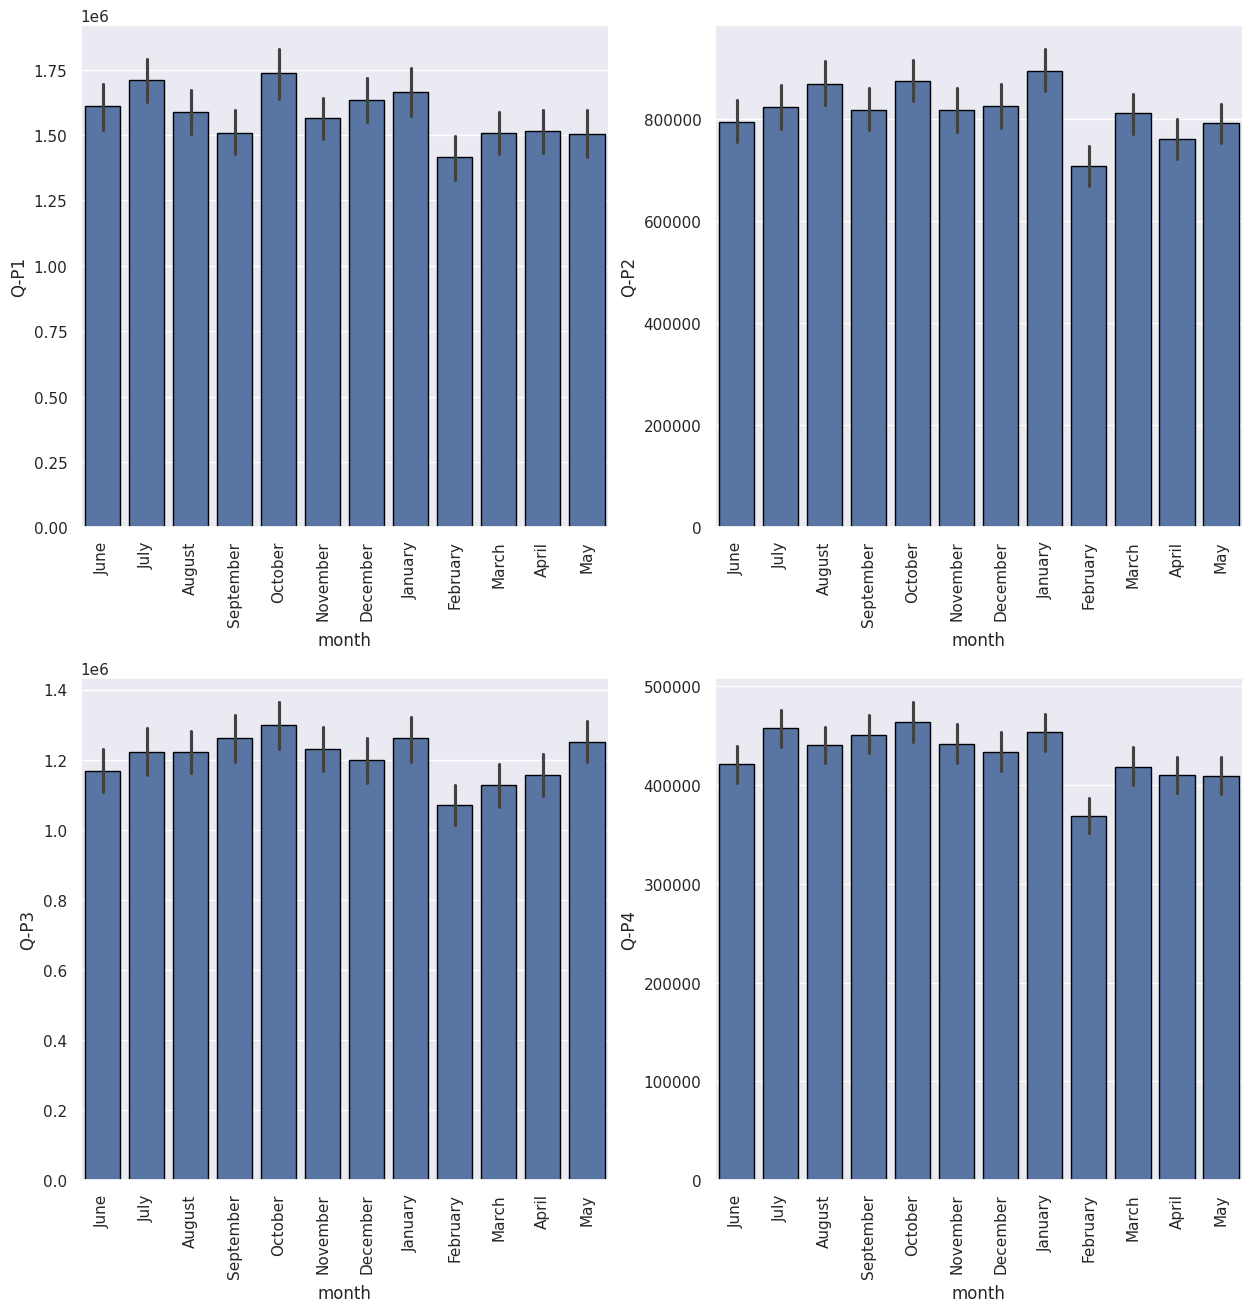

In [45]:
plt.figure(figsize=(15,15),dpi=100)
plt.subplot(2,2,1)
sns.barplot(x="month",y="Q-P1",data=df,edgecolor="black",estimator=sum)
plt.xticks(rotation=90);
plt.subplot(2,2,2)
sns.barplot(x="month",y="Q-P2",data=df,edgecolor="black",estimator=sum)
plt.xticks(rotation=90);
plt.subplot(2,2,3)
sns.barplot(x="month",y="Q-P3",data=df,edgecolor="black",estimator=sum)
plt.xticks(rotation=90);
plt.subplot(2,2,4)
sns.barplot(x="month",y="Q-P4",data=df,edgecolor="black",estimator=sum)
plt.xticks(rotation=90)
plt.subplots_adjust(hspace=0.3);


In [46]:
week_t=df[df["dayoftheweek"]<5]
weekend_t=df[df["dayoftheweek"]>=5]
print(week_t.groupby("day")[["S-P1","S-P2","S-P3","S-P4"]].sum())

                 S-P1        S-P2         S-P3        S-P4
day                                                       
Friday     8838549.62  8898088.56  11056312.20  5142733.53
Monday     8590452.74  8675681.36  11016047.02  5305654.03
Thursday   8499752.70  9010725.00  10895462.86  5112751.88
Tuesday    8458961.14  8590928.24  11084062.60  5253576.51
Wednesday  8476478.56  8995331.48  11328873.16  5139403.82


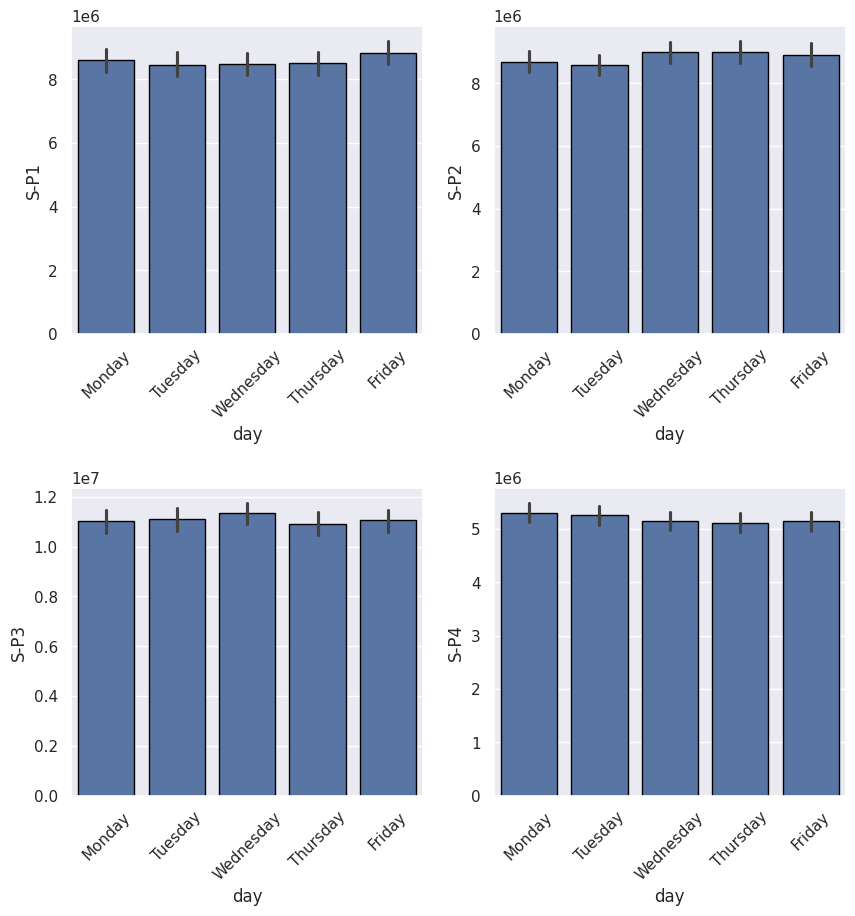

In [47]:
plt.figure(figsize=(10,10),dpi=100)
plt.subplot(2,2,1)
sns.barplot(x="day",y="S-P1",data=week_t,edgecolor="black",estimator=sum)
plt.xticks(rotation=45);
plt.subplot(2,2,2)
sns.barplot(x="day",y="S-P2",data=week_t,edgecolor="black",estimator=sum)
plt.xticks(rotation=45);
plt.subplot(2,2,3)
sns.barplot(x="day",y="S-P3",data=week_t,edgecolor="black",estimator=sum)
plt.xticks(rotation=45);
plt.subplot(2,2,4)
sns.barplot(x="day",y="S-P4",data=week_t,edgecolor="black",estimator=sum)
plt.xticks(rotation=45)
plt.subplots_adjust(hspace=0.5);

In [48]:
print(weekend_t.groupby("day")[["S-P1","S-P2","S-P3","S-P4"]].sum())

                S-P1        S-P2         S-P3        S-P4
day                                                      
Saturday  8845850.13  9233373.12  12064199.14  5612194.12
Sunday    8394759.13  8723402.54  10984632.70  5282239.11


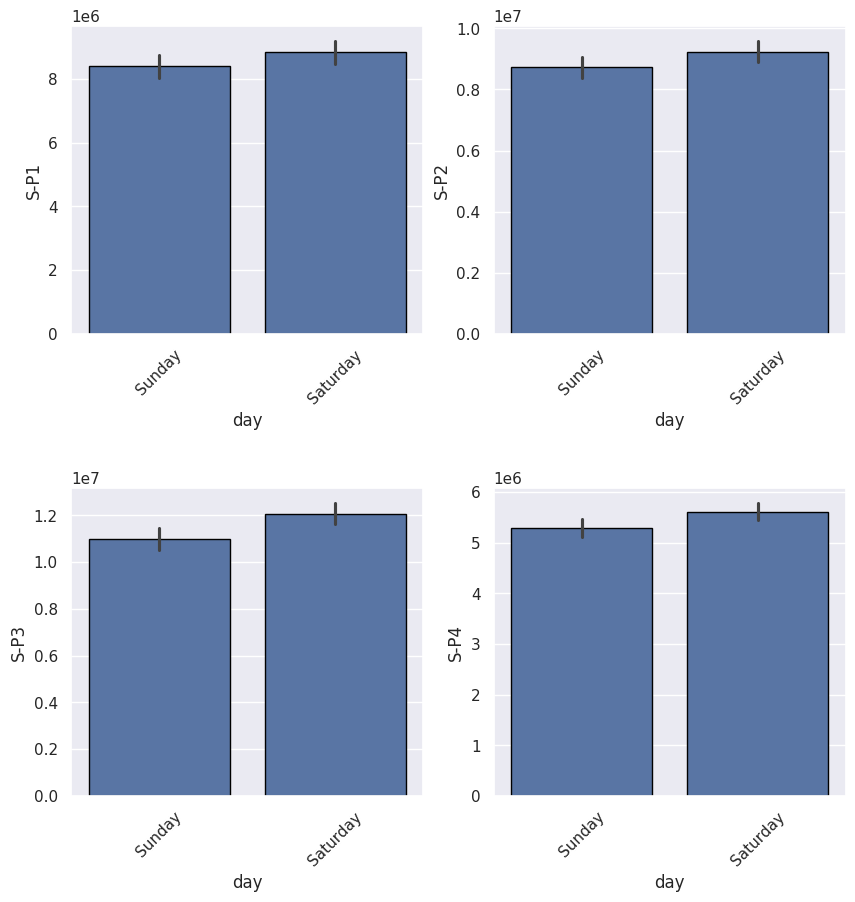

In [49]:
plt.figure(figsize=(10,10),dpi=100)
plt.subplot(2,2,1)
sns.barplot(x="day",y="S-P1",data=weekend_t,edgecolor="black",estimator=sum)
plt.xticks(rotation=45);
plt.subplot(2,2,2)
sns.barplot(x="day",y="S-P2",data=weekend_t,edgecolor="black",estimator=sum)
plt.xticks(rotation=45);
plt.subplot(2,2,3)
sns.barplot(x="day",y="S-P3",data=weekend_t,edgecolor="black",estimator=sum)
plt.xticks(rotation=45);
plt.subplot(2,2,4)
sns.barplot(x="day",y="S-P4",data=weekend_t,edgecolor="black",estimator=sum)
plt.xticks(rotation=45)
plt.subplots_adjust(hspace=0.5);

In [50]:
# In which year revenue was the highest
df.groupby("year")[["S-P1","S-P2","S-P3","S-P4"]].agg(["sum"])

,S-P1,S-P2,S-P3,S-P4
,sum,sum,sum,sum
year,,,,
2010,2543459.01,2720100.92,3385462.08,1567523.37
2011,4542819.22,4741147.10,6235075.86,2921603.06
2012,4771163.83,4861987.50,6173911.16,2965210.14
2013,4833682.57,4771369.88,6017809.74,2868491.69
2014,4954522.97,4979797.38,6265406.18,2865119.20
2015,4669720.66,4833806.20,5987988.90,2933224.96
2016,5096066.64,5313116.54,6507718.12,3096444.92
2017,4628545.53,5085909.96,6269568.74,2969944.46


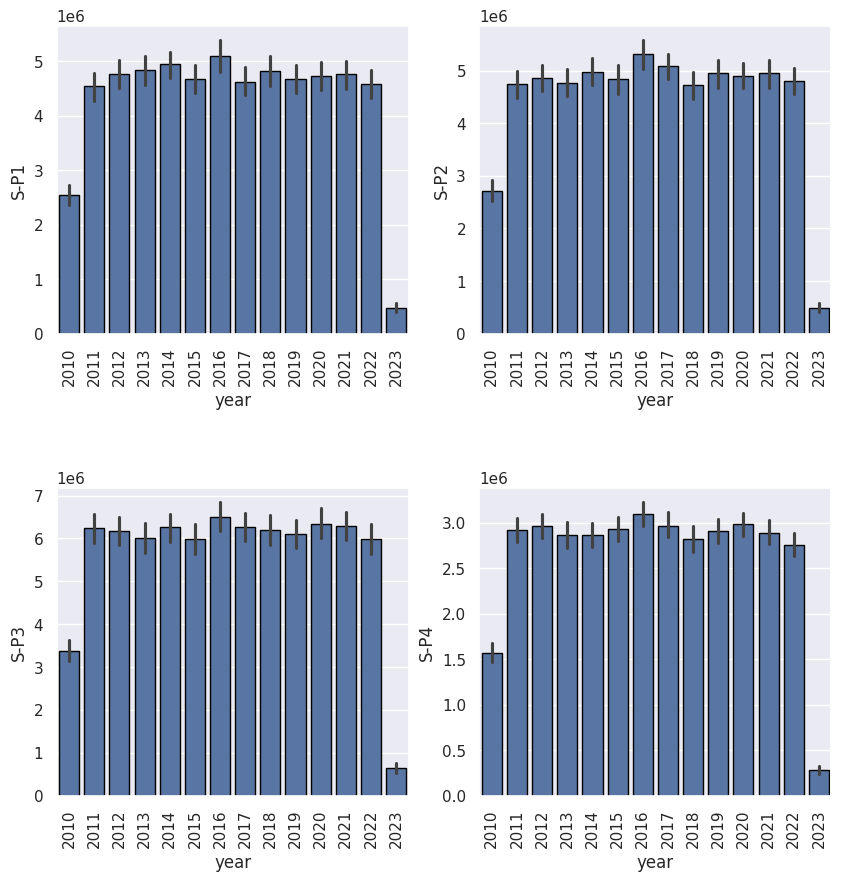

In [51]:
plt.figure(figsize=(10,10),dpi=100)
plt.subplot(2,2,1)
sns.barplot(x="year",y="S-P1",data=df,edgecolor="black",estimator=sum)
plt.xticks(rotation=90);
plt.subplot(2,2,2)
sns.barplot(x="year",y="S-P2",data=df,edgecolor="black",estimator=sum)
plt.xticks(rotation=90);
plt.subplot(2,2,3)
sns.barplot(x="year",y="S-P3",data=df,edgecolor="black",estimator=sum)
plt.xticks(rotation=90);
plt.subplot(2,2,4)
sns.barplot(x="year",y="S-P4",data=df,edgecolor="black",estimator=sum)
plt.xticks(rotation=90)
plt.subplots_adjust(hspace=0.5);

In [52]:
## What was the avg revenue, maximum and min
df[["S-P1","S-P2","S-P3","S-P4"]].agg(["sum","max","min","mean"])

,S-P1,S-P2,S-P3,S-P4
sum,6.010480e+07,6.212753e+07,7.842959e+07,3.684855e+07
max,2.535366e+04,2.534732e+04,3.252000e+04,1.426000e+04
min,8.051800e+02,1.591340e+03,1.355000e+03,1.782500e+03
mean,1.306626e+04,1.350598e+04,1.704991e+04,8.010555e+03


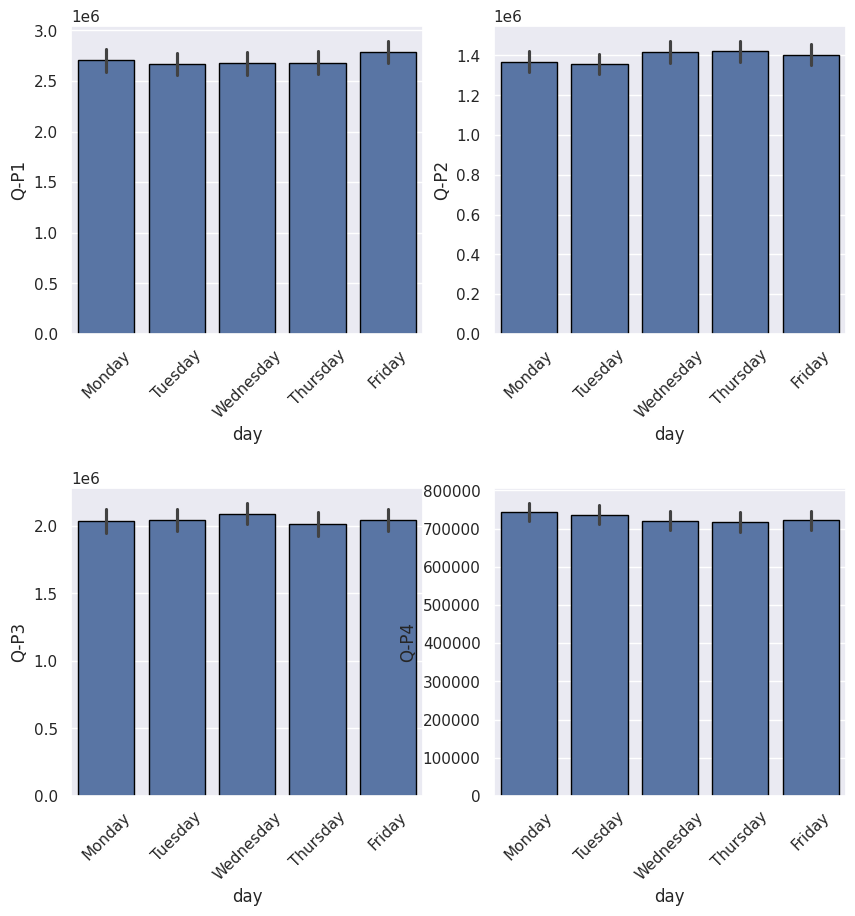

In [53]:
plt.figure(figsize=(10,10),dpi=100)
plt.subplot(2,2,1)
sns.barplot(x="day",y="Q-P1",data=week_t,edgecolor="black",estimator=sum)
plt.xticks(rotation=45);
plt.subplot(2,2,2)
sns.barplot(x="day",y="Q-P2",data=week_t,edgecolor="black",estimator=sum)
plt.xticks(rotation=45);
plt.subplot(2,2,3)
sns.barplot(x="day",y="Q-P3",data=week_t,edgecolor="black",estimator=sum)
plt.xticks(rotation=45);
plt.subplot(2,2,4)
sns.barplot(x="day",y="Q-P4",data=week_t,edgecolor="black",estimator=sum)
plt.xticks(rotation=45)
plt.subplots_adjust(hspace=0.5);

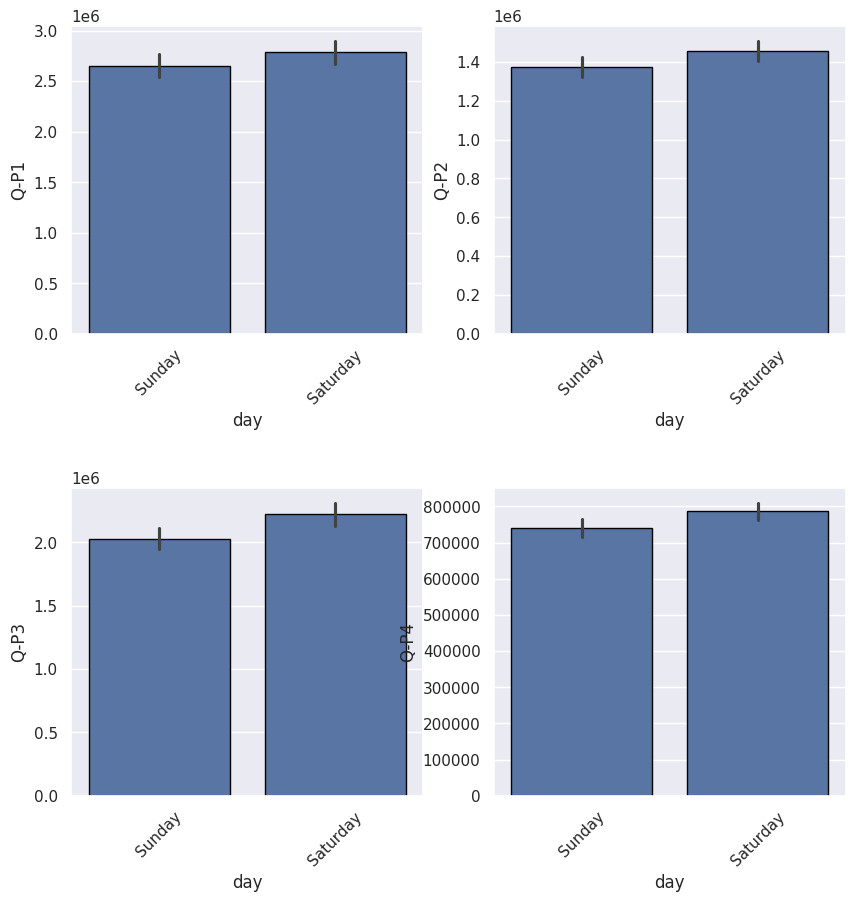

In [54]:
plt.figure(figsize=(10,10),dpi=100)
plt.subplot(2,2,1)
sns.barplot(x="day",y="Q-P1",data=weekend_t,edgecolor="black",estimator=sum)
plt.xticks(rotation=45);
plt.subplot(2,2,2)
sns.barplot(x="day",y="Q-P2",data=weekend_t,edgecolor="black",estimator=sum)
plt.xticks(rotation=45);
plt.subplot(2,2,3)
sns.barplot(x="day",y="Q-P3",data=weekend_t,edgecolor="black",estimator=sum)
plt.xticks(rotation=45);
plt.subplot(2,2,4)
sns.barplot(x="day",y="Q-P4",data=weekend_t,edgecolor="black",estimator=sum)
plt.xticks(rotation=45)
plt.subplots_adjust(hspace=0.5);

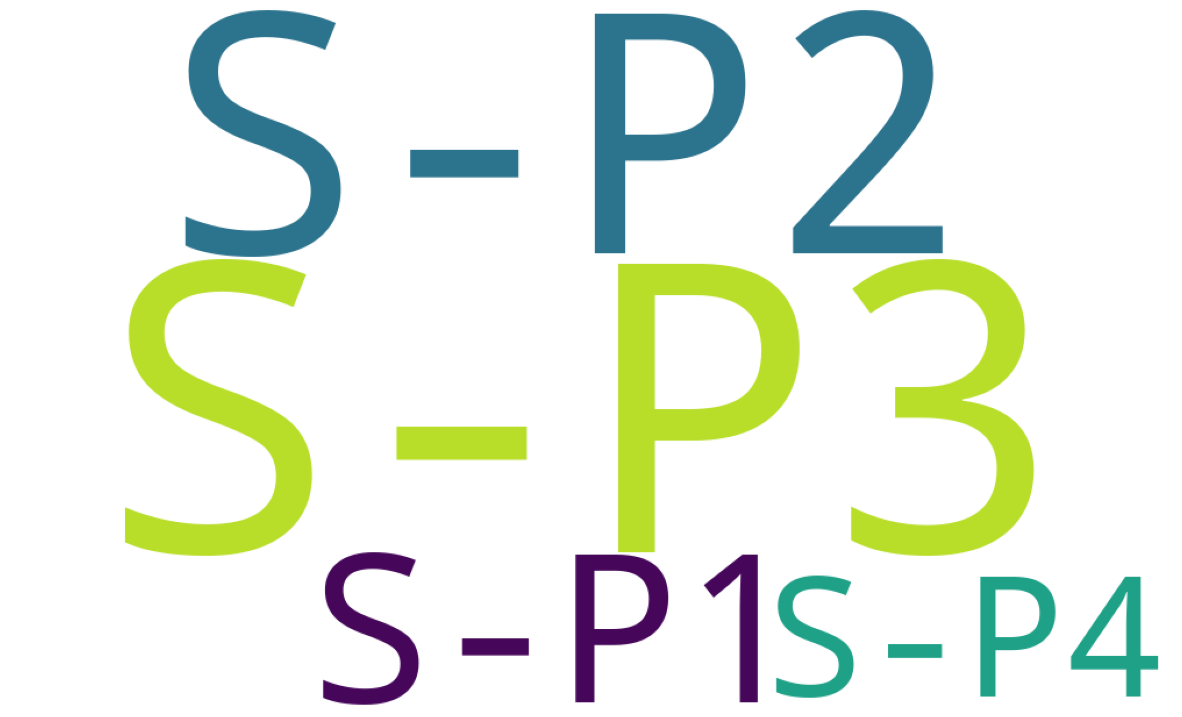

In [55]:
from wordcloud import WordCloud as word
d=df[["S-P1","S-P2","S-P3","S-P4"]].sum()
wc = word(background_color='white', width=1000, height=600)
wc.generate_from_frequencies(d)
plt.figure(figsize=(15,15),dpi=100)
plt.imshow(wc)
plt.axis('off')
plt.show()


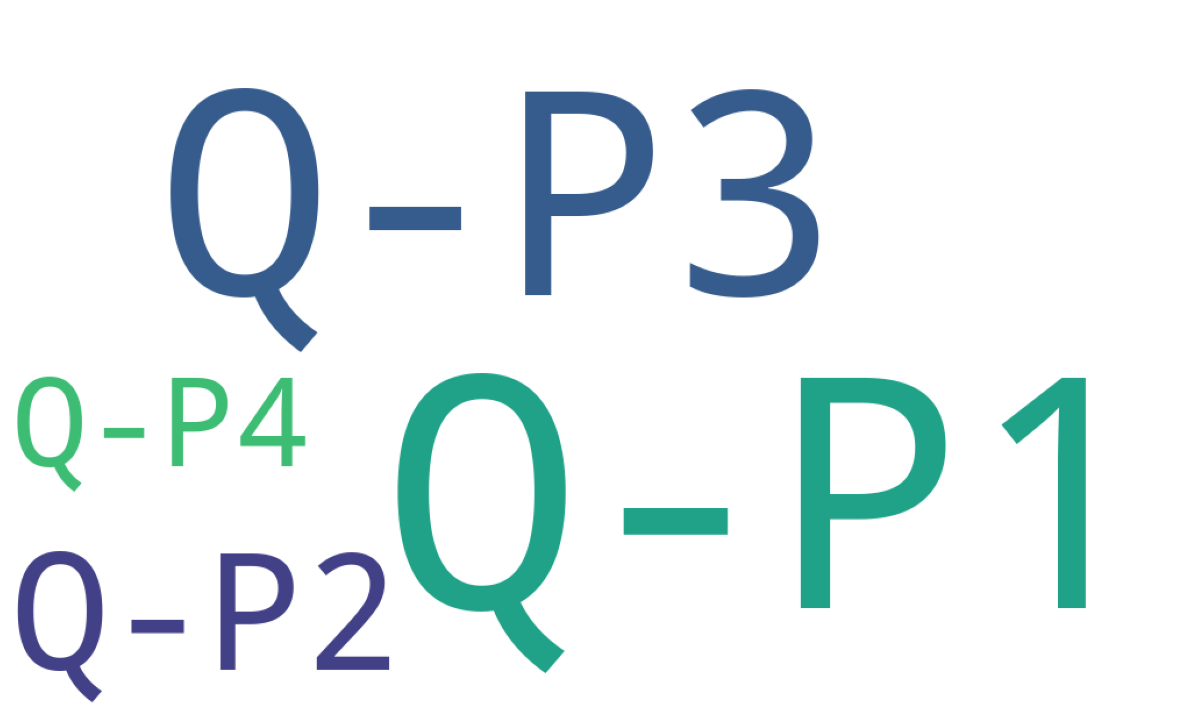

In [56]:
q=df[["Q-P1","Q-P2","Q-P3","Q-P4"]].sum()
wc = word(background_color='white', width=1000, height=600)
wc.generate_from_frequencies(q)
plt.figure(figsize=(15,15),dpi=100)
plt.imshow(wc)
plt.axis('off')
plt.show()